<a href="https://colab.research.google.com/github/Intelligent07/CodeSoft/blob/main/Recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas


In [ ]:
import pandas as pd

# Sample dataset of movies
movies = pd.DataFrame({
    'MovieID': [1, 2, 3, 4, 5],
    'Title': ['The Matrix', 'Inception', 'Interstellar', 'The Dark Knight', 'Pulp Fiction'],
    'Genres': ['Sci-Fi,Action', 'Sci-Fi,Thriller', 'Sci-Fi,Adventure', 'Action,Drama', 'Crime,Drama']
})

# Sample user preferences
user_preferences = ['Sci-Fi', 'Action']

# Function to recommend movies based on user preferences
def recommend_movies(movies, user_preferences):
    # Filter movies that match the user's preferred genres
    recommended = movies[movies['Genres'].apply(lambda x: any(genre in x for genre in user_preferences))]
    return recommended

# Get recommendations
recommendations = recommend_movies(movies, user_preferences)
print("Recommended Movies:")
print(recommendations[['Title', 'Genres']])


Recommended Movies:
             Title            Genres
0       The Matrix     Sci-Fi,Action
1        Inception   Sci-Fi,Thriller
2     Interstellar  Sci-Fi,Adventure
3  The Dark Knight      Action,Drama


In [ ]:
pip install pandas scikit-learn


Step 2: Python Code for Collaborative Filtering

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Sample user-item rating matrix
data = {
    'The Matrix': [5, 4, 0, 0, 0],
    'Inception': [4, 0, 0, 0, 0],
    'Interstellar': [0, 0, 5, 3, 0],
    'The Dark Knight': [0, 0, 4, 5, 0],
    'Pulp Fiction': [0, 0, 0, 0, 5]
}

# User ratings (rows = users, columns = movies)
ratings = pd.DataFrame(data, index=['User1', 'User2', 'User3', 'User4', 'User5'])

# Function to recommend movies based on collaborative filtering
def recommend_movies_cf(ratings, target_user):
    # Calculate user similarity matrix
    user_similarity = cosine_similarity(ratings.fillna(0))
    user_similarity_df = pd.DataFrame(user_similarity, index=ratings.index, columns=ratings.index)

    # Get similar users to the target user
    similar_users = user_similarity_df[target_user].sort_values(ascending=False)

    # Recommend movies liked by similar users
    target_ratings = ratings.loc[target_user]
    recommendations = {}
    for user in similar_users.index:
        if user != target_user:
            for movie in ratings.columns:
                if ratings.loc[user, movie] > 0 and pd.isna(target_ratings[movie]):
                    recommendations[movie] = recommendations.get(movie, 0) + ratings.loc[user, movie] * similar_users[user]

    # Sort recommendations
    recommended_movies = sorted(recommendations.items(), key=lambda x: x[1], reverse=True)
    return [movie for movie, _ in recommended_movies]

# Recommend movies for User1
recommended_movies = recommend_movies_cf(ratings, 'User1')
print("Recommended Movies for User1:")
print(recommended_movies)


Recommended Movies for User1:
[]


In [ ]:
pip install pandas scikit-learn


In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Sample movie dataset (Content-Based)
movies = pd.DataFrame({
    'MovieID': [1, 2, 3, 4, 5],
    'Title': ['The Matrix', 'Inception', 'Interstellar', 'The Dark Knight', 'Pulp Fiction'],
    'Genres': ['Sci-Fi,Action', 'Sci-Fi,Thriller', 'Sci-Fi,Adventure', 'Action,Drama', 'Crime,Drama']
})

# Sample user-item rating matrix (Collaborative Filtering)
ratings = pd.DataFrame({
    'The Matrix': [5, 4, 0, 0, 0],
    'Inception': [4, 0, 0, 0, 0],
    'Interstellar': [0, 0, 5, 3, 0],
    'The Dark Knight': [0, 0, 4, 5, 0],
    'Pulp Fiction': [0, 0, 0, 0, 5]
}, index=['User1', 'User2', 'User3', 'User4', 'User5'])

# User Preferences (Content-Based)
user_preferences = ['Sci-Fi', 'Action']

# Function for Content-Based Filtering
def content_based_recommendation(movies, user_preferences):
    recommended = movies[movies['Genres'].apply(lambda x: any(genre in x for genre in user_preferences))]
    return recommended[['Title']]

# Function for Collaborative Filtering
def collaborative_filtering(ratings, target_user):
    user_similarity = cosine_similarity(ratings.fillna(0))
    user_similarity_df = pd.DataFrame(user_similarity, index=ratings.index, columns=ratings.index)
    similar_users = user_similarity_df[target_user].sort_values(ascending=False)

    target_ratings = ratings.loc[target_user]
    recommendations = {}
    for user in similar_users.index:
        if user != target_user:
            for movie in ratings.columns:
                if ratings.loc[user, movie] > 0 and pd.isna(target_ratings[movie]):
                    recommendations[movie] = recommendations.get(movie, 0) + ratings.loc[user, movie] * similar_users[user]

    recommended_movies = sorted(recommendations.items(), key=lambda x: x[1], reverse=True)
    return [movie for movie, _ in recommended_movies]

# Hybrid Recommendation (Combining CBF & CF)
def hybrid_recommendation(movies, ratings, user_preferences, target_user, alpha=0.5):
    # Content-Based Recommendations
    cb_recs = content_based_recommendation(movies, user_preferences)['Title'].tolist()

    # Collaborative Filtering Recommendations
    cf_recs = collaborative_filtering(ratings, target_user)

    # Combine Recommendations with Weights
    combined_recs = {}
    for movie in cb_recs + cf_recs:
        combined_recs[movie] = alpha * (1 if movie in cb_recs else 0) + (1 - alpha) * (1 if movie in cf_recs else 0)

    # Sort by combined score
    final_recommendations = sorted(combined_recs.items(), key=lambda x: x[1], reverse=True)
    return [movie for movie, _ in final_recommendations]

# Recommendations for User1
final_recommendations = hybrid_recommendation(movies, ratings, user_preferences, 'User1')
print("Hybrid Recommended Movies for User1:")
print(final_recommendations)


Hybrid Recommended Movies for User1:
['The Matrix', 'Inception', 'Interstellar', 'The Dark Knight']


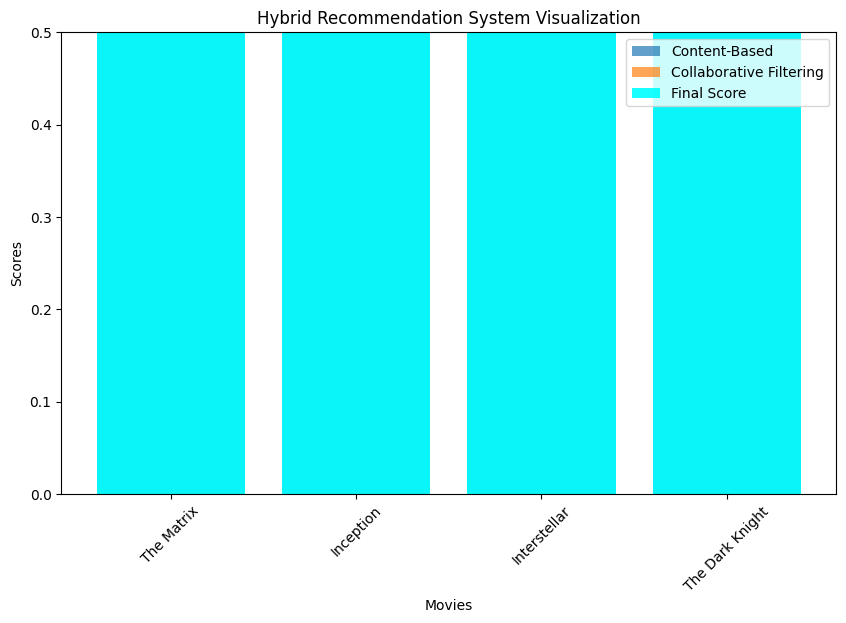

In [ ]:
import matplotlib.pyplot as plt

# Function to visualize the recommendations
def visualize_recommendations(movies, ratings, user_preferences, target_user, alpha=0.5):
    # Content-Based Recommendations
    cb_recs = content_based_recommendation(movies, user_preferences)['Title'].tolist()

    # Collaborative Filtering Recommendations
    cf_recs = collaborative_filtering(ratings, target_user)

    # Combine Recommendations with Weights
    combined_recs = {}
    for movie in cb_recs + cf_recs:
        cb_score = alpha * (1 if movie in cb_recs else 0)
        cf_score = (1 - alpha) * (1 if movie in cf_recs else 0)
        combined_recs[movie] = cb_score + cf_score

    # Prepare data for plotting
    movies_list = list(combined_recs.keys())
    cb_scores = [alpha if movie in cb_recs else 0 for movie in movies_list]
    cf_scores = [(1 - alpha) if movie in cf_recs else 0 for movie in movies_list]
    final_scores = [cb + cf for cb, cf in zip(cb_scores, cf_scores)]

    # Plotting
    x = range(len(movies_list))
    plt.figure(figsize=(10, 6))
    plt.bar(x, cb_scores, label='Content-Based', alpha=0.7)
    plt.bar(x, cf_scores, bottom=cb_scores, label='Collaborative Filtering', alpha=0.7)
    plt.bar(x, final_scores, alpha=0.9, label='Final Score', color='cyan')

    plt.xticks(x, movies_list, rotation=45)
    plt.xlabel('Movies')
    plt.ylabel('Scores')
    plt.title('Hybrid Recommendation System Visualization')
    plt.legend()

    plt.show()

# Visualize recommendations for User1
visualize_recommendations(movies, ratings, user_preferences, 'User1')
